# Graduation Rate




## Source : http://roycekimmons.com/tools/generated_data/graduation_rate

### Mengimport Library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#mendefinisikan dataframe dari data pada drive
df = pd.read_csv('/content/drive/My Drive/data/graduation_rate.csv', sep=",")
df.head()

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,32,2176,some college,72139,4.0,3.8,4
1,25,1824,some high school,43058,3.3,3.3,4
2,33,2050,some college,62760,4.0,3.4,4
3,25,1916,some college,51311,3.5,3.1,5
4,30,2079,high school,41751,3.9,3.5,5


In [4]:
#menampilkan jenis masing-masing atribut yang terlibat
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ACT composite score          1000 non-null   int64  
 1   SAT total score              1000 non-null   int64  
 2   parental level of education  1000 non-null   object 
 3   parental income              1000 non-null   int64  
 4   high school gpa              1000 non-null   float64
 5   college gpa                  1000 non-null   float64
 6   years to graduate            1000 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 54.8+ KB


In [5]:
#Cek Data NULL
df.isnull()

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False


In [9]:
#mengelompokkan setiap variabel berdasarkan jenis datanya, numerik atau kategorikal
score = ['ACT composite score','SAT total score','high school gpa','college gpa','years to graduate','parental income']
category = ['parental level of education']


In [10]:
#menampilkan statistik deskriptif masing-masing atribut
df[score].describe()

,ACT composite score,SAT total score,high school gpa,college gpa,years to graduate,parental income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,28.712000,2007.892000,3.727200,3.381700,4.950000,66471.961000
std,2.574429,136.276299,0.276073,0.242268,1.358435,19449.314327
min,21.000000,1532.000000,2.600000,2.600000,3.000000,11248.000000
25%,27.000000,1913.000000,3.500000,3.200000,4.000000,52650.000000
50%,29.000000,2008.000000,3.800000,3.400000,5.000000,66605.000000
75%,31.000000,2105.000000,4.000000,3.525000,6.000000,79651.000000
max,36.000000,2393.000000,4.000000,4.000000,10.000000,116611.000000


In [11]:
#mengecek banyaknya nilai unik dari atribut parental level of education
df[category].describe()

,parental level of education
count,1000
unique,6
top,some college
freq,215


In [12]:
df['parental level of education'].unique()

array(['some college', 'some high school', 'high school',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

# Exploratory Data Analysis


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5aadeb7950>,
      dtype=object)

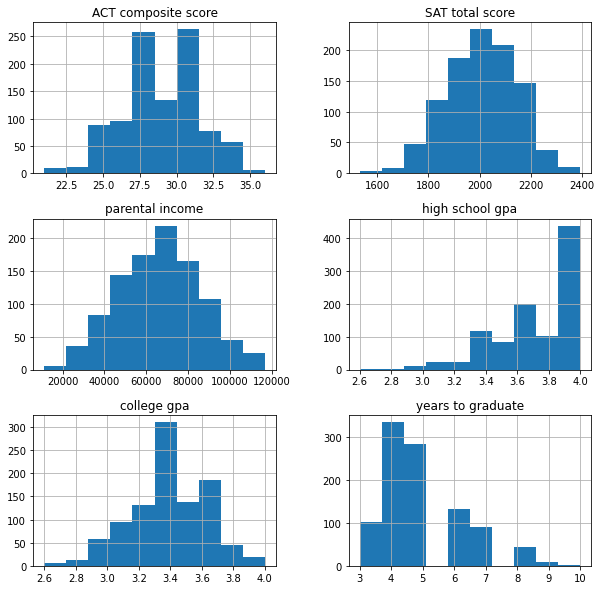

In [13]:
#visualisasi data masing-masing atribut
df.hist(figsize=(10,10))

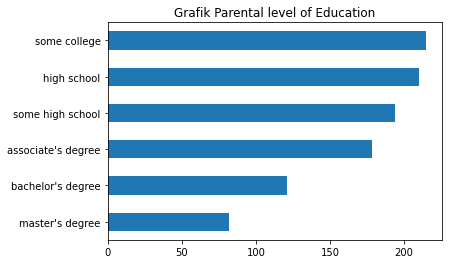

In [14]:

df['parental level of education'].value_counts().sort_values().plot(kind = 'barh',title = 'Grafik Parental level of Education')

# Data Preparation

In [15]:
data = df.copy()
data.head()

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,32,2176,some college,72139,4.0,3.8,4
1,25,1824,some high school,43058,3.3,3.3,4
2,33,2050,some college,62760,4.0,3.4,4
3,25,1916,some college,51311,3.5,3.1,5
4,30,2079,high school,41751,3.9,3.5,5


In [16]:
#mengubah variabel years to graduate menjadi variabel kategorik on time dan late
def kategori(data):
    
    if (data['years to graduate'] <=5):
        return "On Time"
    else:
        return "Late"
    
data['years category'] = data.apply(kategori, axis = 1)
data.head()

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate,years category
0,32,2176,some college,72139,4.0,3.8,4,On Time
1,25,1824,some high school,43058,3.3,3.3,4,On Time
2,33,2050,some college,62760,4.0,3.4,4,On Time
3,25,1916,some college,51311,3.5,3.1,5,On Time
4,30,2079,high school,41751,3.9,3.5,5,On Time


In [17]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 363 kB/s 


In [18]:
#meng-encode variabel years category
import category_encoders as ce
encoder= ce.OrdinalEncoder(cols=['years category'],return_df=True,
                           mapping=[{'col':'years category',
'mapping':{'On Time':1,'Late':2}}])
data = encoder.fit_transform(data)
data.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate,years category
0,32,2176,some college,72139,4.0,3.8,4,1
1,25,1824,some high school,43058,3.3,3.3,4,1
2,33,2050,some college,62760,4.0,3.4,4,1
3,25,1916,some college,51311,3.5,3.1,5,1
4,30,2079,high school,41751,3.9,3.5,5,1


In [19]:
#meng-encode variabel parental level of education
data['parent_edu_numerical'] = data['parental level of education'].map({'some high school':0, 'high school':1,'some college':2,'bachelor\'s degree':3,'associate\'s degree':4,'master\'s degree':5})


In [20]:
data

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate,years category,parent_edu_numerical
0,32,2176,some college,72139,4.0,3.8,4,1,2
1,25,1824,some high school,43058,3.3,3.3,4,1,0
2,33,2050,some college,62760,4.0,3.4,4,1,2
3,25,1916,some college,51311,3.5,3.1,5,1,2
4,30,2079,high school,41751,3.9,3.5,5,1,1
...,...,...,...,...,...,...,...,...,...
995,28,1923,high school,71767,3.6,3.6,3,1,1
996,30,1993,high school,73603,3.7,3.3,4,1,1
997,29,2100,bachelor's degree,60315,4.0,3.0,5,1,3
998,33,2258,master's degree,99694,4.0,3.5,5,1,5


In [21]:
data['years to graduate']= pd.Categorical(df['years to graduate'])

In [22]:
data

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate,years category,parent_edu_numerical
0,32,2176,some college,72139,4.0,3.8,4,1,2
1,25,1824,some high school,43058,3.3,3.3,4,1,0
2,33,2050,some college,62760,4.0,3.4,4,1,2
3,25,1916,some college,51311,3.5,3.1,5,1,2
4,30,2079,high school,41751,3.9,3.5,5,1,1
...,...,...,...,...,...,...,...,...,...
995,28,1923,high school,71767,3.6,3.6,3,1,1
996,30,1993,high school,73603,3.7,3.3,4,1,1
997,29,2100,bachelor's degree,60315,4.0,3.0,5,1,3
998,33,2258,master's degree,99694,4.0,3.5,5,1,5


# Modeling

In [23]:
#mendefinisikan data prediktor dan data label
X = data[['ACT composite score','SAT total score','high school gpa','parental income','parent_edu_numerical']]
y = data['years category']

In [24]:
#membagi menjadi data training dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state =1)

 K Nearest Neighbours

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,classification_report, confusion_matrix

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
#score_knn = metrics.accuracy_score(y_test, y_pred_knn)
#print("Akurasi K Nearest Neighbor: ", score_knn)
f1_knn = f1_score(y_pred_knn,y_test)
print ('F1-score K Nearest Neighbours: {0}'.format(f1_knn))

F1-score K Nearest Neighbours: 0.8042105263157895


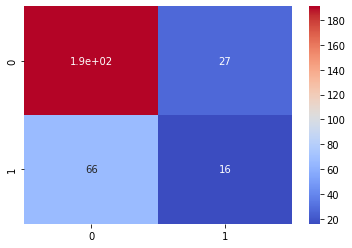

In [27]:
cm = confusion_matrix(y_test,y_pred_knn)

sns.heatmap(cm,annot=True,cmap='coolwarm')

Kita akan mencoba menaikan performa dari metode KNN dengan Hyperparameter

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])
params = [{'knn__n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
         'knn__weights': ['uniform', 'distance']}]
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_knn.fit(X_train, y_train)
gs_knn.best_params_

{'knn__n_neighbors': 8, 'knn__weights': 'uniform'}

Dari hyperparameter diatas agar performa KNN optimal, menggunakan parameter 'knn__n_neighbors': 8, 'knn__weights': 'uniform'


In [30]:
knn_tuned = KNeighborsClassifier(n_neighbors=8,weights='uniform')

knn_tuned.fit(X_train, y_train)
y_pred_knn_tuned = knn_tuned.predict(X_test)
f1_knn_tuned = f1_score(y_pred_knn_tuned,y_test)
print ('F1-score K Nearest Neighbours Tuned: {0}'.format(f1_knn_tuned))

F1-score K Nearest Neighbours Tuned: 0.831013916500994


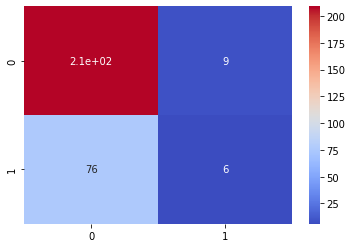

In [31]:
cm = confusion_matrix(y_test,y_pred_knn_tuned)

sns.heatmap(cm,annot=True,cmap='coolwarm')